<a href="https://colab.research.google.com/github/swaroopsaikuchi/Neural_Tensor/blob/main/confusion_matrix_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

circles = pd.DataFrame({"X0":x[:,0],"X1" :x[:,1],"Y":y})
circles

,X0,X1,Y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [3]:
len(x)

1000

In [4]:
## now we will perform train and test spilt on data
x_train,y_train = x[:800],y[:800]
x_test,y_test = x[800:],y[800:]
x_train,y_train

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.64889467, -0.51222194],
        [-0.18878747,  0.74504113],
        [-0.27333143, -0.70507331]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [19]:
## lets recreate a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation ="relu" ),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])
model.compile(loss = "binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ["accuracy"])
loss = model.fit(x_train,y_train,epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.5250
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.4988
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.6300
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6690 - accuracy: 0.5987
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6573 - accuracy: 0.5775
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6396 - accuracy: 0.7613
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6129 - accuracy: 0.7550
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5761 - accuracy: 0.9388
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5257 - accuracy: 0.9750
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.9538
Epoch 11/

In [6]:
history = model.evaluate(x_train,y_train)
history

25/25 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000


[0.0014398625353351235, 1.0]

In [7]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7e8a2b010fd0>>

In [8]:
model.predict(x_test)

7/7 [==============================] - 0s 4ms/step


array([[9.99826312e-01],
       [9.99999702e-01],
       [9.99952614e-01],
       [9.99990225e-01],
       [6.13372698e-02],
       [3.34033866e-05],
       [9.97946262e-01],
       [4.26829465e-05],
       [9.99966145e-01],
       [4.25108010e-04],
       [9.99565125e-01],
       [1.98558912e-01],
       [9.99866009e-01],
       [9.98415947e-01],
       [9.99992490e-01],
       [9.99988675e-01],
       [9.99398589e-01],
       [9.99450982e-01],
       [2.97496095e-04],
       [9.99862134e-01],
       [1.89311595e-05],
       [9.99910355e-01],
       [9.99947548e-01],
       [9.99845922e-01],
       [3.45740264e-05],
       [9.97730553e-01],
       [9.99865413e-01],
       [1.75192300e-03],
       [9.72609269e-06],
       [9.99995589e-01],
       [6.68845450e-06],
       [9.99896348e-01],
       [9.99970973e-01],
       [3.84006271e-05],
       [7.52057228e-03],
       [9.99968171e-01],
       [9.99736369e-01],
       [9.98117983e-01],
       [9.99998629e-01],
       [9.99998629e-01],


In [9]:
## lets draw a decision boundary
import numpy as np

def plot_decision_boundary(model,x,y):
  x_min,x_max = x[:,0].min() - 0.1 , x[:,0].max() + 0.1
  y_min,y_max = x[:,1].min() - 0.1 , x[:,1].max() + 0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
  x_in = np.c_[xx.ravel(), yy.ravel()]
  y_pred = model.predict(x_in)

  if model.output_shape[-1] > 1:
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)

In [10]:
 x_min,x_max = x[:,0].min() - 0.1 , x[:,0].max() + 0.1
 y_min,y_max = x[:,1].min() - 0.1 , x[:,1].max() + 0.1
 x_min,x_max

(-1.1595024599098636, 1.1337117525463374)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


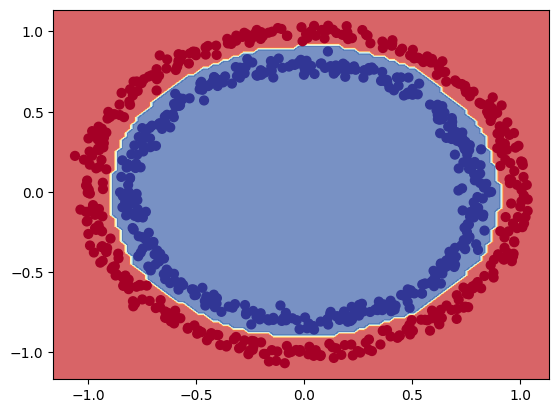

In [16]:
plot_decision_boundary(model,x_train,y_train)

1000

In [ ]:
x,y

<Axes: >

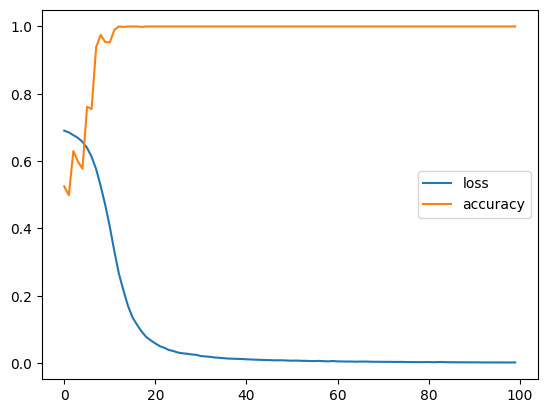

In [21]:
pd.DataFrame(loss.history)

<Axes: >

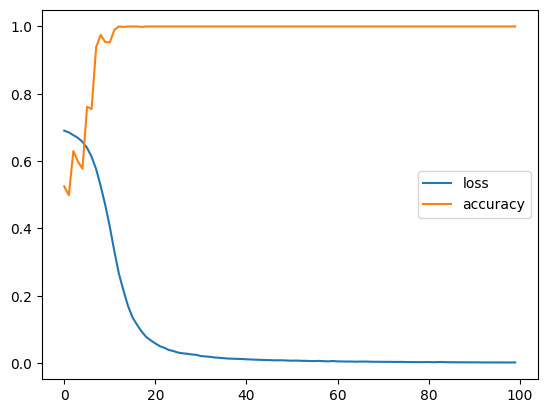

In [22]:
pd.DataFrame(loss.history).plot()

In [31]:
## for finding the best learning rate
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                metrics = ["accuracy"]
)
# introducing learning rate call_backs
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10**(epoch/20))
# fitting the model
loss_1 = model_1.fit(x_train,y_train,epochs = 100,callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7037 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7021 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.4950 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4812 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4700 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4700 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: >

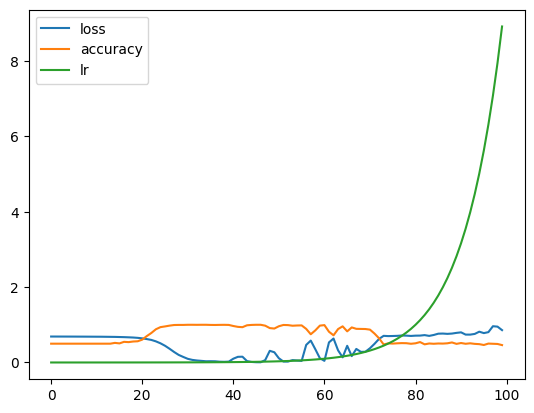

In [30]:
pd.DataFrame(loss_1.history).plot()

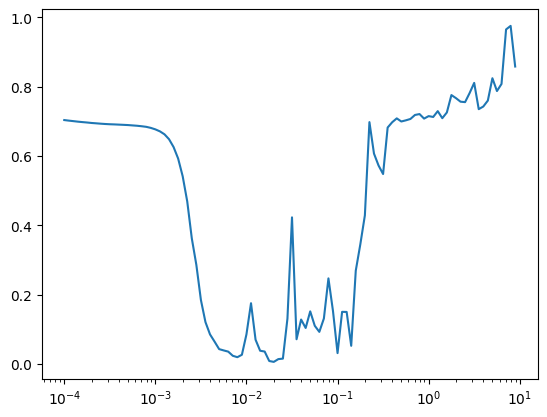

In [40]:
lr =  1e-4 * (10 ** (tf.range(100)/20))
plt.semilogx(lr,loss_1.history["loss"])

## More Classsification Evaluation Methods


#Accuracy


#precision


#Recall


#F1-Score


#confusion matrix

#classification-report using scikit_learn


In [42]:
loss , accuracy = model.evaluate(x_test,y_test)
loss
accuracy

7/7 [==============================] - 0s 6ms/step - loss: 0.0062 - accuracy: 1.0000


1.0

In [51]:
## how about confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
# create confusion_matrix
confusion_matrix(y_test,tf.round(y_pred))

7/7 [==============================] - 0s 4ms/step


array([[101,   0],
       [  0,  99]])

In [47]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [48]:
y_pred[:10]

array([[9.9994361e-01],
       [9.9999833e-01],
       [9.9996954e-01],
       [9.9997944e-01],
       [5.2729573e-02],
       [4.0795490e-05],
       [9.9887288e-01],
       [3.0285973e-05],
       [9.9996638e-01],
       [2.0349993e-04]], dtype=float32)

In [49]:
# convert prediction probabilities to binary format and view the first 10
tf.round(y_pred)

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
 